# Computer Vision Assignments: Sessions 1 & 2

This notebook contains tasks and assignments based on Sessions 1 and 2. You are required to implement the functions and complete the exercises as described. Use OpenCV and other necessary libraries like NumPy and Matplotlib.

**Instructions:**
- Complete each task in the provided code cells.
- Test your implementations with sample images (e.g., download test images [here](https://sipi.usc.edu/database/database.php?volume=misc) or [here](https://www.hlevkin.com/hlevkin/06testimages.htm) or use your own test images).
- Include comments in your code for clarity.
- Display results using cv2.imshow() or Matplotlib where appropriate.
- Submit the completed notebook along with any output images or explanations on [our google drive for the CV sessions](https://drive.google.com/drive/folders/1IjVhJmAXxNQTGT-ybJ-yc5smYtR5v8CO?usp=sharing) **upload your files in a new folder under your name**

## Session 1: Basic Image Operations (Reading, Resizing, Cropping, Rotating)

### Task 1: Read and Display an Image
Read an image from a file and display it in both BGR and grayscale formats. Handle errors if the image cannot be read.

In [2]:
import cv2 as cv
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import random

# Your code here
img = cv.imread('images/dogBGR.jpg')  



In [ ]:
# Read in BGR
cv.imshow('dog', img)


# Read in Grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("gray", gray)
cv.waitKey(0)
cv.destroyAllWindows()



# Display both using cv.imshow() or plt.imshow()

### Task 2: Resize Image with Aspect Ratio Preservation
Implement resizing while preserving aspect ratio. Downscale to 60% and upscale to 200%. Compare shapes and display originals vs resized.

In [3]:
# Your code here
# Load image

# Downscale to 60%
down_scale = 60

h,w , _ = img.shape
h = int(down_scale *h/100)
w = int(down_scale *w/100)
dim= (h,w)

down_img = cv.resize(img, dim, interpolation = cv.INTER_AREA)

# Upscale to 200%
up_scale = 200

h,w , _ = img.shape
h = int(up_scale *h/100)
w = int(up_scale *w/100)
dim= (h,w)

up_img = cv.resize(img, dim, interpolation = cv.INTER_AREA)


# Display all three
cv.imshow("Original", img)
cv.imshow("down scale", down_img)
cv.imshow("up scale", up_img )
cv.waitKey(0)
cv.destroyAllWindows()



### Task 3: Resize Without Preserving Aspect Ratio
Resize only width to 100 pixels, only height to 200 pixels, and both to (200, 200). Display and discuss distortions.

In [4]:
# Your code here
h,w , _ = img.shape
h = h
w = 100
dim = (h,w)

w_img = cv.resize(img, dim , interpolation = cv.INTER_AREA)
cv.imshow("width_only", w_img)
h,w , _ = img.shape
h = 200
w = w
dim = (h,w)

h_img = cv.resize(img, dim , interpolation = cv.INTER_AREA)
cv.imshow("h_only", h_img)

h,w , _ = img.shape
h = 200
w = 200
dim = (h,w)

both_img = cv.resize(img, dim , interpolation = cv.INTER_AREA)
cv.imshow("both", both_img)



### Task 4: Resize Using Scale Factors (fx, fy)
Scale up by 1.2 in both directions and down by 0.6. Use different interpolations (INTER_LINEAR, INTER_NEAREST) and compare quality.

In [5]:
# Your code here
# Experiment with interpolations
scale_up_x = 1.2
scale_up_y = 1.2
scale_down = 0.6
scaled_f_down = cv.resize(img, None, fx= scale_down, fy= scale_down, interpolation= cv.INTER_LINEAR)
scaled_f_up = cv.resize(img, None, fx= scale_up_x, fy= scale_up_y, interpolation= cv.INTER_LINEAR)
scaled_f_down2 = cv.resize(img, None, fx= scale_down, fy= scale_down, interpolation= cv.INTER_NEAREST)
scaled_f_up2 = cv.resize(img, None, fx= scale_up_x, fy= scale_up_y, interpolation= cv.INTER_NEAREST)
cv.imshow("Orignal", img)
cv.waitKey(0)
cv.imshow("scale up ", scaled_f_up)
cv.waitKey(0)
cv.imshow("scale down ", scaled_f_down)
cv.waitKey(0)
cv.imshow("scale up ", scaled_f_up2)
cv.waitKey(0)
cv.imshow("scale down ", scaled_f_down2)
cv.waitKey(0)
cv.destroyAllWindows()

### Task 5: Cropping an Image
Crop a region (e.g., [20:200, 50:200]) from the image. Display original and cropped.

In [6]:
# Your code here
cropped = img[20:200, 50:200]
cv.imshow('Original', img)
cv.imshow('Cropped', cropped)
cv.waitKey(0)
cv.destroyAllWindows()


### Task 6: Advanced Cropping - Patch Image into Blocks
Divide the image into 4 equal blocks (2x2 grid) by cropping. Display each block separately and then stitch them back using NumPy concatenation to verify.

In [7]:
# Your code here
# Calculate midpoints for height and width
height, width , _= img.shape
center = (width/2, height/2)  
mid_x = int(center[0]) 
mid_y = int(center[1])
# Crop into top-left, top-right, bottom-left, bottom-right
top_left = img[0:mid_y, 0:mid_x]
top_right = img[0:mid_y, mid_x:width]
bottom_left = img[mid_y:height, 0:mid_x]
bottom_right = img[mid_y:height, mid_x:width]
# Display each
cv.imshow('Top Left', top_left)
cv.imshow('Top Right', top_right)
cv.imshow('Bottom Left', bottom_left)
cv.imshow('Bottom Right', bottom_right)
cv.waitKey(0) 
# Stitch back (use np.hstack and np.vstack)
top_row = np.hstack([top_left, top_right])
bottom_row = np.hstack([bottom_left, bottom_right])
stitched_image = np.vstack([top_row, bottom_row])
cv.imshow('Stitched Image', stitched_image)
print(f"Original image shape: {img.shape}")
print(f"Stitched image shape: {stitched_image.shape}")

cv.waitKey(0)
cv.destroyAllWindows()

Original image shape: (183, 275, 3)
Stitched image shape: (183, 275, 3)


### Task 7: Rotating an Image
Rotate the image by 45°, 90°, and 180° using getRotationMatrix2D and warpAffine. Display all rotations.

In [8]:
# Your code here
# Calculate center
height, width , _= img.shape
center = (width/2, height/2)
# For each angle: get matrix, warp, display
angles = [45, 90, 180]
for angle in angles:
    rotate_matrix = cv.getRotationMatrix2D(center=center, angle=angle, scale=1.0)
    rotated_image = cv.warpAffine(src=img, M=rotate_matrix, dsize=(width, height))
    cv.imshow(f"Rotated by {angle} Degrees", rotated_image)
    cv.waitKey(0)
cv.destroyAllWindows()


### Task 8: Rotate with Scaling
Rotate by 45° and scale by 0.5 in **one** operation. Compare with separate resize and rotate.

In [9]:
# Your code here
rotate_matrix = cv.getRotationMatrix2D(center=center, angle=45, scale=0.5)
rotated_image = cv.warpAffine(src=img, M=rotate_matrix, dsize=(width, height))
cv.imshow(f"Rotated by {angle} Degrees", rotated_image)
cv.waitKey(0)
cv.destroyAllWindows()

## Session 2: Image Acquisition, Formats, Color Spaces, Enhancement, and Filtering

### Task 9: Read Image in Different Color Spaces
Read an image in BGR, convert to RGB (for Matplotlib), HSV, LAB and Grayscale. Display all.

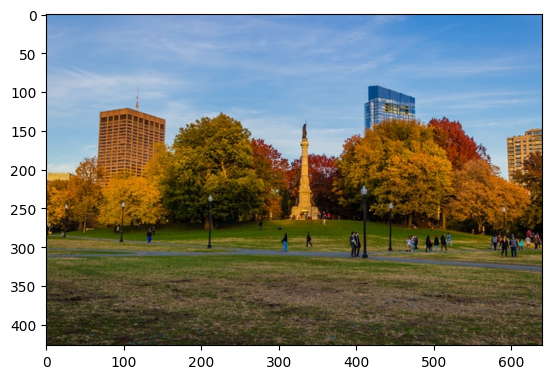

In [10]:
# Your code here
#read BGR img
img = cv.imread('images/park.jpg')
cv.imshow('Park', img)

#BGR to RGB
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.imshow('RGB', rgb)
plt.imshow(rgb)
plt.show()

# BGR TO HSV (Hue, Saturation, and Value)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv.imshow('HSV', hsv)

# BGR to L*a*b
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
cv.imshow('LAB', lab)

# BGR to Grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

cv.waitKey(0)
cv.destroyAllWindows()


### Task 10: Image Sharpening
Apply cv2.blur() with a 5x5 kernel, then use cv2.filter2D() with sharpening kernels of varying strengths (e.g., [[0, -1, 0], [-1, 5, -1], [0, -1, 0]] and [[0, -2, 0], [-2, 9, -2], [0, -2, 0]]).
Compare between original and sharpened image after blurring.

In [ ]:
 # Your code here
# Use cv2.blur
blur = cv.blur(img, (5,5), cv.BORDER_DEFAULT)
cv.imshow('Blur', blur)
cv.waitKey(0)
# Define sharpen kernel, use cv.filter2D()
sharpen_kernel1 = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

sharpen_kernel2 = np.array([
    [0, -2, 0],
    [-2, 9, -2],
    [0, -2, 0]
])

k1 = cv.filter2D(src=blur, ddepth=-1, kernel=sharpen_kernel1)
k2= cv.filter2D(src=blur, ddepth=-1, kernel=sharpen_kernel2)
cv.imshow('Sharpened1', k1)
cv.waitKey(0)
cv.imshow('Sharpened2', k2)
cv.waitKey(0)
cv.destroyAllWindows()



### Task 11: Add Salt and Pepper Noise to Image
Implement a function to add salt and pepper noise to an image. Control noise density (e.g., 0.05).

In [11]:
# Your code here

def add_salt_pepper_noise(img, density=0.05):
    # Implement using random pixels set to 0 or 255
    noisy_image = img.copy()
    noise = np.random.rand(noisy_image.shape[0], noisy_image.shape[1]) #random noise mask of the same size as the image
    noisy_image[noise < density/2] = 0 
    noisy_image[noise > 1 - density/2 ] = 255
    
    return noisy_image


gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
noisy_image = add_salt_pepper_noise(gray, density=0.05)

cv.imshow('Grayscale', gray)
cv.imshow('With Salt & Pepper Noise', noisy_image)

cv.waitKey(0)
cv.destroyAllWindows()


### Task 12: Remove Salt and Pepper Noise Using Median Filter
Apply cv.medianBlur() to a noisy image. Experiment with kernel sizes (3,5,7) and compare results.

In [ ]:
# Your code here
# Apply a Median Filter (non linear filter) to remove the noise

k3 = cv.medianBlur(noisy_image, 3)
k5 = cv.medianBlur(noisy_image, 5)
k7 = cv.medianBlur(noisy_image, 7)

cv.imshow('Noisy Image', noisy_image)
cv.imshow('Median Blur - K3', k3)
cv.imshow('Median Blur - K5', k5)
cv.imshow('Median Blur - K7', k7)

cv.waitKey(0)
cv.destroyAllWindows()
#window size of the conventional median filter is fixed!! Standard Median Filter: Replaces every single pixel with the median of its neighbors. 

### Task 13: Implement Adaptive Median Filter
Write a custom function for adaptive median filtering. It should dynamically increase window size until noise is removed or max size is reached. Apply to a noisy image and compare with standard median.

In [ ]:
# Your code here
def adaptive_median_filter(image, min_size=3, max_size=7):
    border_size = max_size // 2
    # Pad image to handle pixels at the border
    padded_image = cv.copyMakeBorder(image, border_size, border_size, border_size, border_size, cv.BORDER_REFLECT)
    output_image = image.copy()
    
    # Iterate over each pixel of the original image
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            
            current_size = min_size
            while current_size <= max_size:
                # Adjust coordinates for the padded image
                pad_y, pad_x = y + border_size, x + border_size
                
                # Extract the local window
                offset = current_size // 2
                window = padded_image[pad_y - offset : pad_y + offset + 1, pad_x - offset : pad_x + offset + 1]
                
                # Calc Zmin, Zmax, Zmed
                pixels = sorted(window.flatten())
                z_min = pixels[0]
                z_max = pixels[-1]
                z_med = pixels[len(pixels) // 2]
                z_xy = image[y, x]

                #test A
                if z_min < z_med < z_max:
                    # test B 
                    if z_min < z_xy < z_max:
                        output_image[y, x] = z_xy       # Pixel is not noise keep original value
                    else:       # Pixel is noise replace with the median
                        output_image[y, x] = z_med
                    break       # Exit loop for this pixel
                else:       
                    current_size += 2           # Increase window size and repeat Stage A
            else:
                # If loop finishes (max_size reached), output the last median
                output_image[y, x] = z_med
                
    return output_image
# Test on noisy image
adaptive_filtered = adaptive_median_filter(noisy_image, min_size=3, max_size=7)
standard_median_filtered = cv.medianBlur(noisy_image, 5)
cv.imshow('Original', img)
cv.imshow('Noisy Image', noisy_image)
cv.imshow('Standard Median Filter', standard_median_filtered)
cv.imshow('Adaptive Median Filter', adaptive_filtered)

cv.waitKey(0)
cv.destroyAllWindows()


'''
A: is the median noise? find Zmin, Zmed, Zmax - if Zmed = Zmin or Zmax then noise then inc window size 
B: is center pixel Zxy noise? if Zxy btw Zmin and Zmax then not noise else replace with Zmed 
Only replaces pixels that fail the tests in Stage A and B. By keeping non-noise pixels untouched
'''

'\nA: is the median noise? find Zmin, Zmed, Zmax - if Zmed = Zmin or Zmax then noise then inc window size \nB: is center pixel Zxy noise? if Zxy btw Zmin and Zmax then not noise else replace with Zmed \nOnly replaces pixels that fail the tests in Stage A and B. By keeping non-noise pixels untouched\n'

### Task 14: Implement Bilateral Filter Function
Write a Python function to perform bilateral filtering on an image. Use Gaussian weights for both spatial and intensity. Parameters: diameter, sigma_color, sigma_space. Compare with cv.bilateralFilter().

In [ ]:
'''
Bilateral filter = gaussian + spatial filter(amplify edges)
-> remove noise wile preserving edges
    
    Args:
        image: Input image (should be BGR color).
        diameter: Diameter of each pixel neighborhood.
        sigma_color: Filter sigma in the color space.
        sigma_space: Filter sigma in the coordinate space.
        
    Returns:
        The filtered image.
'''

# Your code here
def custom_bilateral_filter(image, diameter, sigma_color, sigma_space):

    output_image = np.zeros_like(image)
    pad = diameter // 2
    padded_image = cv.copyMakeBorder(image, pad, pad, pad, pad, cv.BORDER_REFLECT)

    # Pre-calculate the spatial Gaussian weights
    # creates a 2D Gaussian kernel based on distance from the center
    space_gauss_kernel = cv.getGaussianKernel(diameter, sigma_space)
    space_gauss_2d = np.outer(space_gauss_kernel, space_gauss_kernel.T)

    # Iterate over each pixel of the original image
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            pad_y, pad_x = y + pad, x + pad             # Adjust coordinates for the padded image
            window = padded_image[pad_y - pad : pad_y + pad + 1, pad_x - pad : pad_x + pad + 1]            # Extract the local window (neighborhood)
            center_pixel_color = window[pad, pad].astype(np.int32)            # Get the BGR values of the center pixel

            # Calc Color/Intensity Gaussian Weights 
            # Calculate the squared color difference between the center and each neighbor
            color_diff_sq = np.sum((window.astype(np.int32) - center_pixel_color)**2, axis=2)
            
            # Apply the Gaussian function to the color differences
            color_gauss = np.exp(-color_diff_sq / (2 * sigma_color**2))

            # Combine Weights and Apply Filter 
            combined_weights = space_gauss_2d * color_gauss #product of the spatial and color weights
            # Normalize weights
            normalized_weights = combined_weights / np.sum(combined_weights)
            
            # Applyweights to each color channel
            # We need to add a new axis to normalized_weights for broadcasting
            weighted_sum = np.sum(window * normalized_weights[:, :, np.newaxis], axis=(0, 1))
            
            # Assign the calculated pixel value to the output image
            output_image[y, x] = weighted_sum.astype(np.uint8)
            
    return output_image



img = cv.imread('images/dogBGR.jpg')  

# Apply to image, display, and compare with OpenCV's version

custom_filtered = custom_bilateral_filter(img, 15, 80, 80)
opencv_filtered = cv.bilateralFilter(img, 15, 80, 80)

# display results
cv.imshow('Original Image', img)
cv.imshow('Custom Bilateral Filter', custom_filtered)
cv.imshow('OpenCV Bilateral Filter', opencv_filtered)

cv.waitKey(0)
cv.destroyAllWindows()

### [BONUS] Task 15: Comprehensive Camera Task 
Combine: Live camera feed -> grayscale -> add noise -> remove with median -> sharpen. Display all stages in separate windows.

In [16]:
# To read video from camera example:

camera_id = 0
delay = 400
window_name = 'frame'

cap = cv.VideoCapture(camera_id)

if not cap.isOpened():
    sys.exit()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    cv.imshow(window_name, frame)
    if cv.waitKey(delay) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyWindow(window_name)


# Your code here

KeyboardInterrupt: 

### [BONUS]Task 16: Comprehensive Video Task
Similar to Task 18 but for a video file. Save the final processed video.

In [ ]:
# Your code here

### Task 17: Performance Comparison
Time the execution of standard median vs adaptive median on a large noisy image. Discuss when adaptive median filter is better.

In [ ]:
import time
# Your code here
# Use time.time() to measure